# Assignment 2: Human Activity Recognition

Author: 
Matthieu Beylard

## Imports

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

## Merge datasets

In [22]:
data1 = np.genfromtxt("mHealth_subject1.log", delimiter="\t")
column_names = ['x_acc_chest', 'y_acc_chest', 'z_acc_chest', 'ECG1', 'ECG2', 'x_acc_ankle', 'y_acc_ankle', 'z_acc_ankle', 'x_gyro_ankle', 'y_gyro_ankle', 'z_gyro_ankle','x_magnitude_ankle', 'y_magnitude_ankle', 'z_magnitude_ankle', 'x_acc_arm', 'y_acc_arm', 'z_acc_arm', 'x_gyro_arm', 'y_gyro_arm', 'z_gyro_arm', 'x_magnitude_arm', 'y_magnitude_arm', 'z_magnitude_arm', 'label']
subject1 = pd.DataFrame(data=data1, columns=column_names)
data2 = np.genfromtxt("mHealth_subject2.log", delimiter="\t")
subject2 = pd.DataFrame(data=data2, columns=column_names)
data3 = np.genfromtxt("mHealth_subject3.log", delimiter="\t")
subject3 = pd.DataFrame(data=data3, columns=column_names)
data4 = np.genfromtxt("mHealth_subject4.log", delimiter="\t")
subject4 = pd.DataFrame(data=data4, columns=column_names)
data5 = np.genfromtxt("mHealth_subject5.log", delimiter="\t")
subject5 = pd.DataFrame(data=data5, columns=column_names)
data6 = np.genfromtxt("mHealth_subject6.log", delimiter="\t")
subject6 = pd.DataFrame(data=data6, columns=column_names)
data7 = np.genfromtxt("mHealth_subject7.log", delimiter="\t")
subject7 = pd.DataFrame(data=data7, columns=column_names)
data8 = np.genfromtxt("mHealth_subject8.log", delimiter="\t")
subject8 = pd.DataFrame(data=data8, columns=column_names)
data9 = np.genfromtxt("mHealth_subject9.log", delimiter="\t")
subject9 = pd.DataFrame(data=data9, columns=column_names)
data10 = np.genfromtxt("mHealth_subject10.log", delimiter="\t")
subject10 = pd.DataFrame(data=data10, columns=column_names)

all_subjects = pd.concat([subject1, subject2, subject3, subject4, subject5, subject6, subject7, subject8, subject9, subject10])
all_subjects.to_csv ('all_subjects.csv', index=False)

## Load dataset

In [23]:
data_ori = pd.read_csv('all_subjects.csv')
data = data_ori.copy()
data.head()

,x_acc_chest,y_acc_chest,z_acc_chest,ECG1,ECG2,x_acc_ankle,y_acc_ankle,z_acc_ankle,x_gyro_ankle,y_gyro_ankle,...,x_acc_arm,y_acc_arm,z_acc_arm,x_gyro_arm,y_gyro_arm,z_gyro_arm,x_magnitude_arm,y_magnitude_arm,z_magnitude_arm,label
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0.0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0.0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0.0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0.0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   x_acc_chest        1215745 non-null  float64
 1   y_acc_chest        1215745 non-null  float64
 2   z_acc_chest        1215745 non-null  float64
 3   ECG1               1215745 non-null  float64
 4   ECG2               1215745 non-null  float64
 5   x_acc_ankle        1215745 non-null  float64
 6   y_acc_ankle        1215745 non-null  float64
 7   z_acc_ankle        1215745 non-null  float64
 8   x_gyro_ankle       1215745 non-null  float64
 9   y_gyro_ankle       1215745 non-null  float64
 10  z_gyro_ankle       1215745 non-null  float64
 11  x_magnitude_ankle  1215745 non-null  float64
 12  y_magnitude_ankle  1215745 non-null  float64
 13  z_magnitude_ankle  1215745 non-null  float64
 14  x_acc_arm          1215745 non-null  float64
 15  y_acc_arm          1215745 non-n

# Task 1: Prediction

In [25]:
# Define a standard scaler to standardize the data
scaler = StandardScaler() 

data_std = pd.DataFrame(scaler.fit_transform(data))
data_std.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,...,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,8.576460e-16,-1.776729e-18,-9.631744e-17,-4.839250e-18,-3.769706e-18,-1.953467e-16,-2.002094e-16,-3.558134e-17,3.684376e-17,1.885203e-16,...,3.377656e-16,-1.763638e-16,-4.881330e-17,2.339672e-16,3.138265e-16,-1.911387e-16,-4.161287e-18,1.611914e-17,-3.039142e-18,-1.872112e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.414637e+00,-9.338210e+00,-4.852900e+00,-1.153833e+01,-1.184956e+01,-6.178048e+00,-2.379622e+00,-3.372183e+00,-4.366707e+00,-2.022688e+01,...,-3.914612e+00,-2.286784e+00,-5.322552e+00,-1.528002e+01,-5.587907e+00,-5.238195e+00,-1.196575e+01,-1.090207e+01,-1.031167e+01,-5.303398e-01
25%,-3.144901e-01,-4.950545e-01,-5.067903e-01,-3.071371e-01,-2.529074e-01,-3.535596e-01,-1.218137e-01,-3.102629e-01,-8.843159e-01,-5.678377e-01,...,-4.959683e-01,-6.250262e-01,-5.840912e-01,-8.144461e-01,-7.756194e-01,-8.924897e-01,-2.384944e-01,-3.059982e-01,-1.994400e-01,-5.303398e-01
50%,-1.936153e-01,-6.536311e-02,5.197011e-02,-8.846087e-02,-5.138178e-02,-4.842565e-02,5.412814e-03,1.718022e-01,-2.695967e-02,-2.557188e-01,...,1.544663e-01,-2.876134e-01,-1.201548e-01,-1.493190e-01,-3.025214e-01,6.216826e-02,7.212667e-03,-1.083265e-02,-4.401790e-03,-5.303398e-01
75%,2.172265e-01,4.318847e-01,4.985392e-01,2.199345e-01,2.134911e-01,2.826616e-01,1.559893e-01,4.130699e-01,9.172706e-01,2.151243e-01,...,5.289532e-01,5.682238e-01,6.502821e-01,7.053101e-01,6.473828e-01,9.061030e-01,2.482399e-01,2.799125e-01,1.948624e-01,7.873346e-02
max,6.776537e+00,9.883805e+00,7.624711e+00,1.141181e+01,1.172372e+01,4.850354e+00,7.396703e+00,4.754806e+00,1.231342e+02,7.410130e+00,...,4.949511e+00,4.862503e+00,6.022729e+00,6.814068e+00,3.641312e+00,4.400166e+00,9.408394e+00,1.007775e+01,9.454213e+00,3.124100e+00


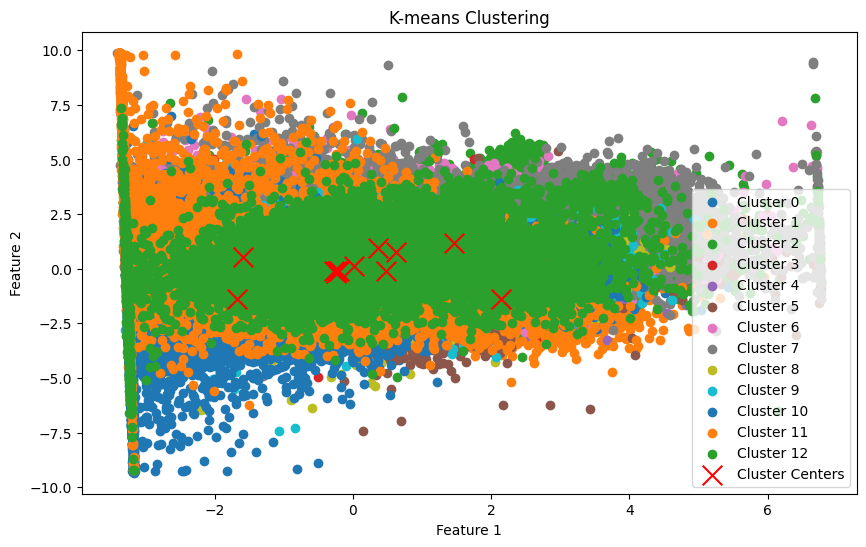

Mean Absolute Error: 0.21145881743293207
Accuracy: 0.9502239367630547


In [26]:
warnings.filterwarnings("ignore", category=UserWarning)

# K-means clustering
n_clusters = 13 # Assuming 13 clusters for labels L0 to L12
kmeans = KMeans(n_clusters, random_state=42) 
kmeans.fit(data_std)

# Assign cluster labels
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Plot the data points and cluster centers based on the first two features (2D plot)
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(data_std.iloc[cluster_labels == i, 0], data_std.iloc[cluster_labels == i, 1], label=f'Cluster {i}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Determine majority class label for each cluster
label_encoder = LabelEncoder()
majority_labels = []
for cluster_id in range(n_clusters):
    cluster_data_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_labels_data = data_std.iloc[cluster_data_indices, -1]
    majority_label = np.argmax(np.bincount(cluster_labels_data.astype(int)))
    majority_labels.append(majority_label)

# Fit LabelEncoder on majority labels
label_encoder.fit(majority_labels)

# Add cluster labels as a new feature
data_std_clustered = data_std.copy()
data_std_clustered['cluster_label'] = cluster_labels

# Split the data into features (X) and labels (y)
X = data_std_clustered.drop(columns=['cluster_label'])
y = data_std_clustered['cluster_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier on the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the performance of the classifier on the testing data
y_pred = knn.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

## Discussion

In this plot, we performed K-means clustering based on the two first features of our dataset. The data points are colored according to their assigned cluster, and the red crosses represent the cluster centers. 

Obviously, two features is not sufficient to distinguish all cluster centers from one another, it is only presented here to get a 2-dimensions plot in order to understand better how the algorithm assign data to distinct groups based on its similarity (position and proximity to the cluster centers) with the other data points. 

The algorithm actually operates on all features from the dataset, making calculations in much more dimensions. It aims to minimize the within-cluster sum of squares, creating clusters that are as internally homogeneous and as externally separated from each other as possible. The K-means clustering allows to identify patterns and groupings in the dataset.

We evaluate the performance of the classifier on the testing data by looking at its mean absolute error and accuracy. The low mean absolute error (approx. 0.211) and the high accuracy (approx. 0.950) of the model shows that it can accurately predict the performed physical activity based on the various features of the dataset.

# Task 2: Feature Engineering

### ANOVA & Information Gain

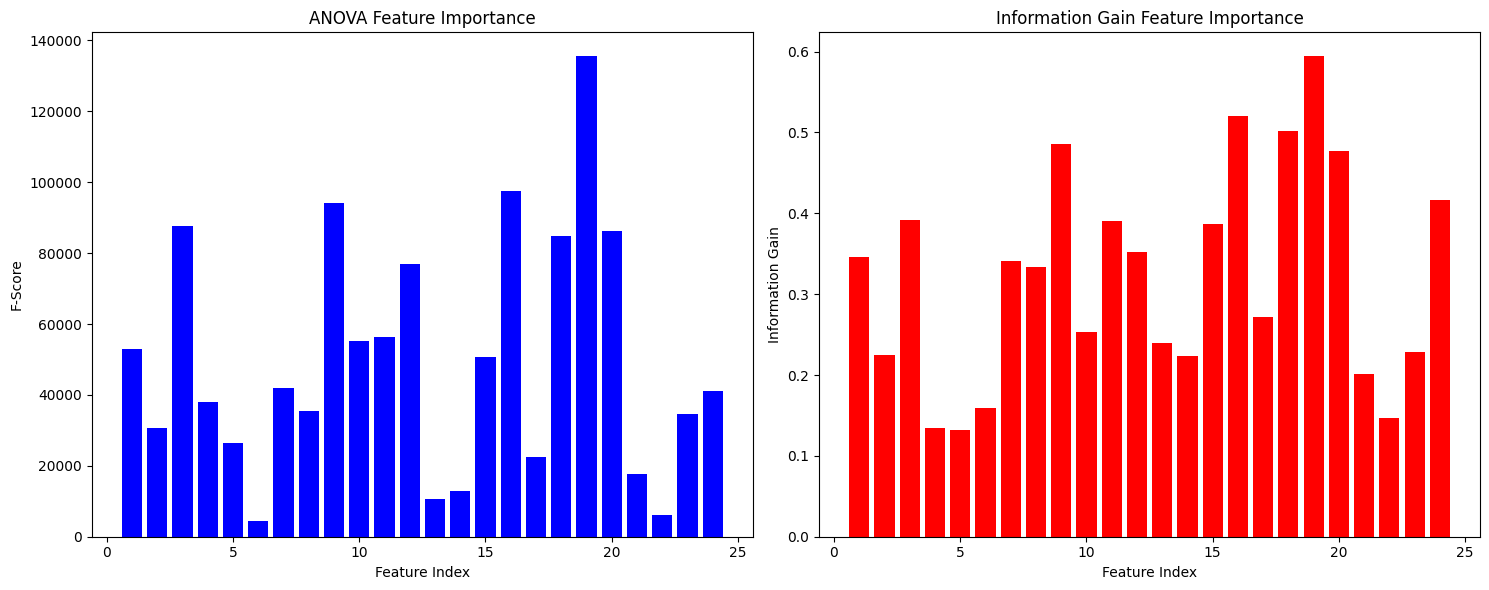

In [27]:
# ANOVA
fs_anova = SelectKBest(score_func=f_classif, k='all')
fs_anova.fit(X_train, y_train)
anova_scores = fs_anova.scores_

# Information Gain
fs_info_gain = SelectKBest(score_func=mutual_info_classif, k='all')
fs_info_gain.fit(X_train, y_train)
info_gain_scores = fs_info_gain.scores_


# Plot feature importance scores for each method
plt.figure(figsize=(15, 6))

# ANOVA
plt.subplot(1, 2, 1)
plt.bar(range(1, len(anova_scores) + 1), anova_scores, color='b')
plt.title('ANOVA Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('F-Score')

# Information Gain
plt.subplot(1, 2, 2)
plt.bar(range(1, len(info_gain_scores) + 1), info_gain_scores, color='r')
plt.title('Information Gain Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Information Gain')

plt.tight_layout()
plt.show()

### Rank features from analyses

In [28]:
# Convert numpy arrays to pandas Series
features = list(range(24))
anova_scores_series = pd.Series(anova_scores, index=features)
info_gain_scores_series = pd.Series(info_gain_scores, index=features)

# Generate a dataframe ranking the features
feature_rankings = pd.DataFrame({
    'Feature': features,
    'ANOVA_Rank': anova_scores_series.rank(ascending=False),
    'Info_Gain_Rank': info_gain_scores_series.rank(ascending=False)})

# Sort the features based on their total rank (sum of ranks from both methods)
feature_rankings['Total_Rank'] = feature_rankings[['ANOVA_Rank', 'Info_Gain_Rank']].sum(axis=1)
feature_rankings_sorted = feature_rankings.sort_values(by='Total_Rank')

# Assign new rankings based on the sorted order of Total_Rank
feature_rankings_sorted['Overall_Rank'] = range(1, len(feature_rankings_sorted) + 1)

print(feature_rankings_sorted)

    Feature  ANOVA_Rank  Info_Gain_Rank  Total_Rank  Overall_Rank
18       18         1.0             1.0         2.0             1
15       15         2.0             2.0         4.0             2
8         8         3.0             4.0         7.0             3
17       17         6.0             3.0         9.0             4
19       19         5.0             5.0        10.0             5
2         2         4.0             7.0        11.0             6
10       10         8.0             8.0        16.0             7
11       11         7.0            10.0        17.0             8
23       23        13.0             6.0        19.0             9
14       14        11.0             9.0        20.0            10
0         0        10.0            11.0        21.0            11
9         9         9.0            15.0        24.0            12
6         6        12.0            12.0        24.0            13
7         7        15.0            13.0        28.0            14
22       2

### Select a subset of features

In [29]:
# Select the top N features with the highest total rank
top_N_features = 8
top_features = feature_rankings_sorted['Feature'].head(top_N_features)

print("Top", top_N_features, "features:", top_features.tolist())

Top 8 features: [18, 15, 8, 17, 19, 2, 10, 11]


### Evaluate the simplified model's performance

In [30]:
# Split the data into features (X) and labels (y) using the top features
X_top = data_std_clustered[top_features]
y_top = data_std_clustered['cluster_label']

# Split the data into training and testing sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.2, random_state=42)

# Train the KNN classifier on the training data using the minimal set of features
knn_top = KNeighborsClassifier(n_neighbors=5)
knn_top.fit(X_train_top, y_train_top)

# Evaluate the performance of the classifier on the testing data using the minimal set of features
accuracy_top = knn_top.score(X_test_top, y_test_top)
print("Accuracy:", accuracy_top)

Accuracy: 0.9079329958173795


### Train and test accuracy based on the number of features

> 1, Train: 0.334, Test: 0.333
> 2, Train: 0.600, Test: 0.451
> 3, Train: 0.756, Test: 0.669
> 4, Train: 0.842, Test: 0.784
> 5, Train: 0.880, Test: 0.834
> 6, Train: 0.895, Test: 0.857
> 7, Train: 0.916, Test: 0.885
> 8, Train: 0.932, Test: 0.908
> 9, Train: 0.937, Test: 0.915
> 10, Train: 0.940, Test: 0.920
> 11, Train: 0.942, Test: 0.923
> 12, Train: 0.943, Test: 0.924
> 13, Train: 0.944, Test: 0.925
> 14, Train: 0.945, Test: 0.926
> 15, Train: 0.947, Test: 0.928
> 16, Train: 0.948, Test: 0.931
> 17, Train: 0.950, Test: 0.932
> 18, Train: 0.967, Test: 0.950
> 19, Train: 0.967, Test: 0.950
> 20, Train: 0.968, Test: 0.950
> 21, Train: 0.968, Test: 0.950
> 22, Train: 0.970, Test: 0.952
> 23, Train: 0.969, Test: 0.951
> 24, Train: 0.969, Test: 0.950


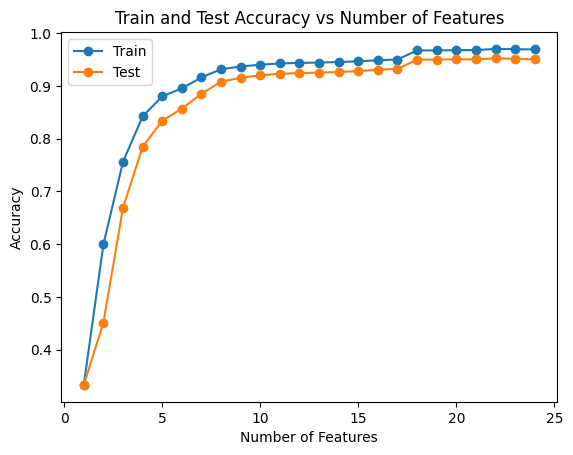

In [20]:
# Split the data into features (X) and labels (y)
X = data_std_clustered.drop(columns=['cluster_label'])
y = data_std_clustered['cluster_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define lists to collect scores
train_scores, test_scores = [], []

# Define the range of k (number of features)
feature_range = range(1, len(X.columns) + 1)

# Evaluate a KNN classifier for each number of features
for k in feature_range:
    top_features = feature_rankings_sorted[feature_rankings_sorted['Overall_Rank'] <= k]['Feature']
    knn = KNeighborsClassifier(n_neighbors=5)
    # Ensure that X_train contains the selected features
    X_train_selected = X_train[top_features]
    knn.fit(X_train_selected, y_train)
    # Evaluate on the training dataset
    train_acc = knn.score(X_train_selected, y_train)
    train_scores.append(train_acc)
    # Ensure that X_test contains the selected features
    X_test_selected = X_test[top_features]
    # Evaluate on the testing dataset
    test_acc = knn.score(X_test_selected, y_test)
    test_scores.append(test_acc)
    # Summarize progress
    print('> %d feature, Train: %.3f, Test: %.3f' % (k, train_acc, test_acc))

# Plot train and test scores vs number of features
plt.plot(feature_range, train_scores, '-o', label='Train')
plt.plot(feature_range, test_scores, '-o', label='Test')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Number of Features')
plt.legend()
plt.show()

## Discussion

Feature engineering identifies the most informative features for predicting target variables. In this analysis, we aim to identify the minimal set of features that can predict each activity based on the provided dataset. We employed two feature selection techniques: ANOVA (Analysis of Variance) and Information Gain. These techniques help assess the relevance of each feature in predicting the target variable (activity label).

- **ANOVA**: This technique evaluates the relationship between each feature and the target variable by comparing the means of the feature values for each activity label. Features with higher F-scores are considered more important.
- **Information Gain**: Information gain measures the reduction in entropy or uncertainty of the target variable when a particular feature is known. Features with higher information gain values are more informative for predicting the target variable.

From these two analyses, we ranked the features based on importance. We then select only the top features, to finally evaluate the new model's performance, using only the selected features. We can also look at the train and test accuracy based on the number of features and notice, as expected, that the most important feature contributes a lot for the model's accuracy, the second slightly less, and so on. The more feature we integrate in our analysis, the more accurate our model become. This is expected as the model has more information to learn from and can potentially fit the training data better.

The accuracy of the testing set also generally increases as the number of features increases, but at a slower rate compared to the training set. This suggests that initially, adding more features helps improve the model's generalization to unseen data. However, beyond a certain point, adding more features may not provide significant improvement and can potentially lead to overfitting. This is what begins to happen after considering 23 features, since the accuracy of the testing set begins diminishing.

For this number of features, the gap between the accuracy of the training and the testing set is small, indicating that the model is not overfitting excessively. However, as the number of features increases, this gap may widen, suggesting potential overfitting. Finally, it seems that the testing accuracy plateaus after relying on about 8 features, indicating that adding more features may not be beneficial and could lead to increased model complexity without significant gains in performance.

# Task 3: Activities separation based on different features

In [31]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Determine unique activity labels
activity_labels = np.unique(data_std_clustered['cluster_label'])

for label in activity_labels:
    print(f"Activity Label: {label}")
    
    # Filter data for the current activity label
    X_label = data_std_clustered[data_std_clustered['cluster_label'] == label].drop(columns=['cluster_label'])
    y_label = data_std_clustered[data_std_clustered['cluster_label'] == label]['cluster_label']
    
    # Perform feature selection for the current activity label
    fs_anova = SelectKBest(score_func=f_classif, k='all')
    fs_anova.fit(X_label, y_label)
    anova_scores = fs_anova.scores_

    fs_info_gain = SelectKBest(score_func=mutual_info_classif, k='all')
    fs_info_gain.fit(X_label, y_label)
    info_gain_scores = fs_info_gain.scores_

    # Convert scores to pandas Series
    features = list(range(len(X_label.columns)))
    anova_scores_series = pd.Series(anova_scores, index=features)
    info_gain_scores_series = pd.Series(info_gain_scores, index=features)

    # Rank features based on ANOVA and information gain scores
    feature_rankings = pd.DataFrame({
        'Feature': features,
        'ANOVA_Rank': anova_scores_series.rank(ascending=False),
        'Info_Gain_Rank': info_gain_scores_series.rank(ascending=False)})

    # Sort the features based on their total rank (sum of ranks from both methods)
    feature_rankings['Total_Rank'] = feature_rankings[['ANOVA_Rank', 'Info_Gain_Rank']].sum(axis=1)
    feature_rankings_sorted = feature_rankings.sort_values(by='Total_Rank')
    
    # Select the top N features with the highest total rank
    top_N_features = 8
    top_features = feature_rankings_sorted['Feature'].head(top_N_features)

    print("Top", top_N_features, "features:", top_features.tolist())
    print("\n")

Activity Label: 0
Top 8 features: [23, 10, 17, 9, 8, 18, 19, 3]


Activity Label: 1
Top 8 features: [23, 8, 19, 7, 9, 6, 10, 3]


Activity Label: 2
Top 8 features: [23, 18, 8, 10, 4, 17, 3, 21]


Activity Label: 3
Top 8 features: [23, 17, 8, 19, 9, 18, 4, 3]


Activity Label: 4
Top 8 features: [23, 18, 19, 9, 10, 17, 8, 4]


Activity Label: 5
Top 8 features: [23, 9, 18, 10, 3, 4, 11, 8]


Activity Label: 6
Top 8 features: [23, 8, 19, 9, 17, 18, 4, 3]


Activity Label: 7
Top 8 features: [23, 17, 10, 19, 18, 6, 9, 21]


Activity Label: 8
Top 8 features: [23, 19, 8, 18, 3, 17, 9, 10]


Activity Label: 9
Top 8 features: [23, 9, 8, 19, 17, 10, 18, 3]


Activity Label: 10
Top 8 features: [23, 21, 20, 19, 18, 17, 16, 15]


Activity Label: 11
Top 8 features: [23, 18, 16, 10, 21, 20, 19, 17]


Activity Label: 12
Top 8 features: [23, 8, 10, 21, 20, 19, 18, 17]




## Discussion

Our feature engineering analysis revealed that different features may predict different activities. By employing the feature selection techniques mentioned above, we can identify the most relevant features for predicting each activity. But what we really want to know is which features provide the most valuable informations when it comes to label the different activities.

For instance if we want to optimize sensor placement using two sensors instead of three, our analysis indicates that we should place one sensor on the **right lower arm** and the other sensor on the **left ankle**, as these are the two sensors that reveal the most valuable informations for activities labelling. Indeed, both sensors are associated with important features, like feature "gyro from the right-lower-arm sensor (Y axis)". If we want to optimize sensor placement using one sensor instead of three, our analysis indicates that we should place the sensor on the **right lower arm**.